# Perdiction of sales

### Problem Statement
This dataset represents sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store are available. The aim is to build a predictive model and find out the sales of each product at a particular store.

|Variable|Description|
|: ------------- |:-------------|
|Item_Identifier|Unique product ID|
|Item_Weight|Weight of product|
|Item_Fat_Content|Whether the product is low fat or not|
|Item_Visibility|The % of total display area of all products in a store allocated to the particular product|
|Item_Type|The category to which the product belongs|
|Item_MRP|Maximum Retail Price (list price) of the product|
|Outlet_Identifier|Unique store ID|
|Outlet_Establishment_Year|The year in which store was established|
|Outlet_Size|The size of the store in terms of ground area covered|
|Outlet_Location_Type|The type of city in which the store is located|
|Outlet_Type|Whether the outlet is just a grocery store or some sort of supermarket|
|Item_Outlet_Sales|Sales of the product in the particulat store. This is the outcome variable to be predicted.|

Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.

---------------------

### Explore the problem in following stages:

1. Hypothesis Generation – understanding the problem better by brainstorming possible factors that can impact the outcome
2. Data Exploration – looking at categorical and continuous feature summaries and making inferences about the data.
3. Data Cleaning – imputing missing values in the data and checking for outliers
4. Feature Engineering – modifying existing variables and creating new ones for analysis
5. Model Building – making predictive models on the data

In [68]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV

import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Read original file:
data = pd.read_csv(r"~/Documents/LHL/Week_3/D3/data_preparation_exercise/regression_exercise.csv", delimiter=',')
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [7]:
#import feature selected data
data2 = pd.read_csv(r"~/Documents/LHL/Week_3/D3/data_preparation_exercise/new_food_two.csv", delimiter=',')
data2.head()

,Unnamed: 0,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Item_Outlet_Sales,Years_Operated,Item_Type_Baking Goods,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Category_Drink,Category_Food,Category_Non-Consumables
0,0,9.30,1,0.016047,249.8092,1999,1,3735.1380,23,0,...,1,0,0,0,1,0,0,0,1,0
1,1,5.92,2,0.019278,48.2692,2009,1,443.4228,13,0,...,0,0,1,0,0,1,0,1,0,0
2,2,17.50,1,0.016760,141.6180,1999,1,2097.2700,23,0,...,1,0,0,0,1,0,0,0,1,0
3,3,19.20,2,0.000000,182.0950,1998,3,732.3800,24,0,...,0,0,1,1,0,0,0,0,1,0
4,4,8.93,0,0.000000,53.8614,1987,2,994.7052,35,0,...,0,0,1,0,1,0,0,0,0,1


In [38]:
data2.shape

(8523, 35)

In [10]:
#create X and Y
X = data2.drop(['Unnamed: 0','Item_Outlet_Sales'], axis = 1)
y = data2['Item_Outlet_Sales']

#split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    shuffle=True, 
                                                    train_size=0.80,
                                                   random_state=42)

#Check number of samples
print(f'{len(X_train)} training samples and {len(X_test)} test samples for X')
print(f'{len(y_train)} training samples and {len(y_test)} test samples for y')

6818 training samples and 1705 test samples for X
6818 training samples and 1705 test samples for y


We have covered how to prepare a dataset and the process of feature engineering two weeks ago. In addition, we have already created Lasso and Ridge regressions on Monday. Today, we will be working with the ensemble methods. 

-------------------------
### Model Building: Ensemble Models

Try out the different ensemble models (Random Forest Regressor, Gradient Boosting, XGBoost)
- **Note:** Spend some time on the documention for each of these models.
- **Note:** As you spend time on this challenge, it is suggested to review how each of these models work and how they compare to each other.

Calculate the **mean squared error** on the test set. Explore how different parameters of the model affect the results and the performance of the model. (*Stretch: Create a visualization to display this information*)

- Use GridSearchCV to find optimal paramaters of models.
- Compare agains the Lasso and Ridge Regression models from Monday.

**Questions to answer:**
- Which ensemble model performed the best? 

### Ensemble Model 1: Random Forest Regressor

In [12]:
#instantiate regressor
RFR = RandomForestRegressor(n_estimators = 100, max_depth = 5,
                            n_jobs = 2, random_state= 0)

#fit regressor to training set
RFR.fit(X_train, y_train)

#create y prediction
y_pred_RFR = RFR.predict(X_test)

In [13]:
#calculate the mean squared error
RFR_mse = mean_squared_error(y_test, y_pred_RFR)
print('MSE:', RFR_mse)
print('RMSE:', np.sqrt(RFR_mse))

MSE: 1041702.2946738364
RMSE: 1020.6381800980387


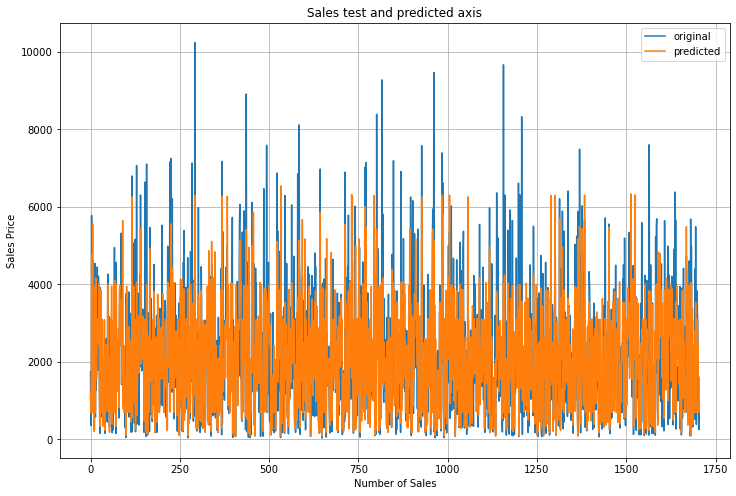

In [19]:
#plot original and predicited sales
plt.figure(figsize=(12,8))
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred_RFR, label="predicted")
plt.title("Sales test and predicted axis")
plt.xlabel('Number of Sales')
plt.ylabel('Sales Price')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [57]:
#print accruacy
print('The accuracy score is:', RFR.score(X_test, y_test))
#print('The classification report:', classification_report(y_test, y_pred_RFR))

The accuracy score is: 0.6167351850307432


In [50]:
#check feature importance
RFR.feature_importances_
RFR_data = {'Features': X_train.columns, 'Importance':RFR.feature_importances_}
RFR_data = pd.DataFrame(RFR_data)
RFR_data.head()

,Features,Importance
0,Item_Weight,0.000201
1,Item_Fat_Content,0.000054
2,Item_Visibility,0.001783
3,Item_MRP,0.553754
4,Outlet_Establishment_Year,0.015092


In [46]:
#check level of importance
RFR_data.Importance.nlargest(n=5)

3     0.553754
26    0.317330
29    0.068006
6     0.041998
4     0.015092
Name: Importance, dtype: float64

### Ensemble Model 2: Gradient Boosting

In [52]:
#instantiate regressor
GB = GradientBoostingRegressor(n_estimators = 100, learning_rate = 1,
                            max_depth = 5, random_state= 0)

#fit regressor to training set
GB.fit(X_train, y_train)

#create y prediction
y_pred_GB = GB.predict(X_test)

In [53]:
#calculate the mean squared error
GB_mse = mean_squared_error(y_test, y_pred_GB)
print('MSE:', GB_mse)
print('RMSE:', np.sqrt(GB_mse))

MSE: 1981679.7177515512
RMSE: 1407.7214631281115


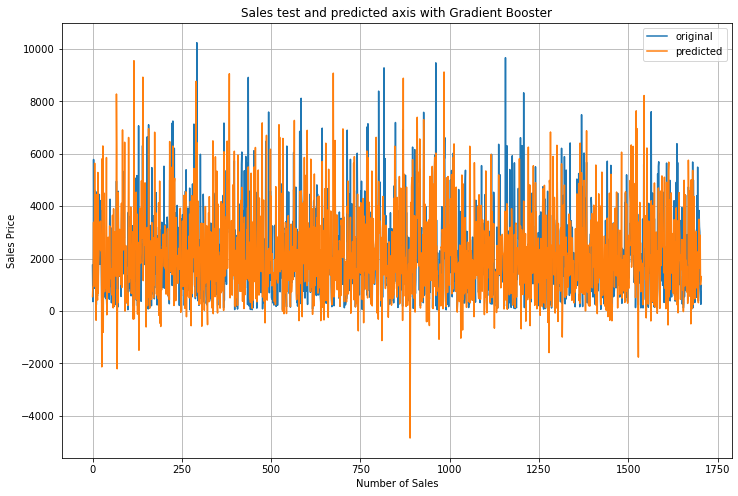

In [54]:
#plot original and predicted values

plt.figure(figsize=(12,8))
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred_GB, label="predicted")
plt.title("Sales test and predicted axis with Gradient Booster")
plt.xlabel('Number of Sales')
plt.ylabel('Sales Price')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [56]:
#print accuracy
print('The accuracy score is:', GB.score(X_test, y_test))
#print('The classification report:', classification_report(y_test, y_pred_RFR))

The accuracy score is: 0.27089715148397187


In [58]:
#create fetaures and coefficient table
GB_data = {'Features': X_train.columns, 'Importance':GB.feature_importances_}
GB_data = pd.DataFrame(GB_data)
GB_data.head()

,Features,Importance
0,Item_Weight,0.040169
1,Item_Fat_Content,0.005380
2,Item_Visibility,0.086173
3,Item_MRP,0.493783
4,Outlet_Establishment_Year,0.021163


In [59]:
#find largest importance
RFR_data.Importance.nlargest(n=5)
#importance is still the same as RFR

3     0.553754
26    0.317330
29    0.068006
6     0.041998
4     0.015092
Name: Importance, dtype: float64

### Ensemble Model 3 : XGBoost

In [61]:
#convert data into optimized data structure
data_dmatrix = xgb.DMatrix(data=X,label=y)
data_dmatrix

In [62]:
#instantiate XGBoost
XG = xgb.XGBRegressor(subsample = 0.5, colsample_bytree = 0.3,
                max_depth = 5, alpha = 0.1, n_estimators = 100)

#fit regressor 
XG.fit(X_train,y_train)

#make predictions for X
y_pred_XG = XG.predict(X_test)

In [63]:
#calculate the mean squared error
XG_mse = mean_squared_error(y_test, y_pred_XG)
print('MSE:', XG_mse)
print('RMSE:', np.sqrt(XG_mse))

MSE: 1197165.0855933102
RMSE: 1094.1503944126284


In [64]:
#print accuracy
print('The accuracy score is:', XG.score(X_test, y_test))
#print('The classification report:', classification_report(y_test, y_pred_RFR))

The accuracy score is: 0.5595370602872316


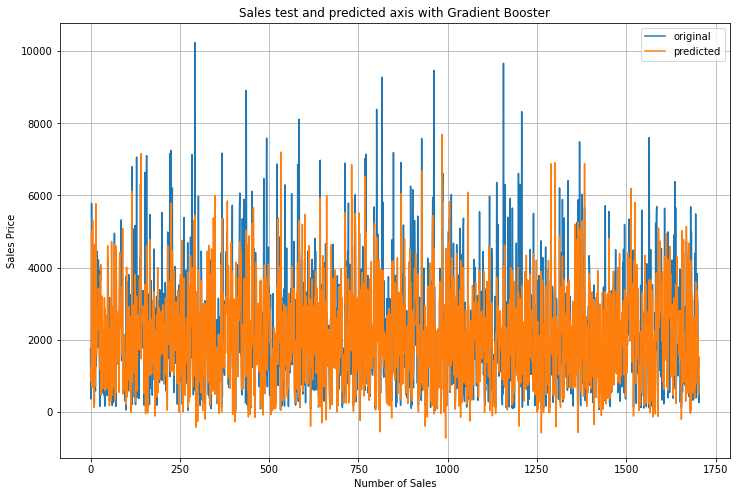

In [65]:
#plot original and predicted values

plt.figure(figsize=(12,8))
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred_XG, label="predicted")
plt.title("Sales test and predicted axis with Gradient Booster")
plt.xlabel('Number of Sales')
plt.ylabel('Sales Price')
plt.legend(loc='best')
plt.grid(True)
plt.show()

### Grid Search for optimal params for models

#### with Random Forest

In [77]:
#instantiate regressor
rfr = RandomForestRegressor(random_state = 10)

#create parameters dictionary
rfr_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [4,5,6,7,8],
    'max_features': ['auto','sqrt','log2']
}

#create gridsearch
CV_rfr = GridSearchCV(estimator = rfr, param_grid=rfr_grid, cv=5)

#fit to training data
CV_rfr.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=10),
             param_grid={'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200, 300, 400, 500]})

In [78]:
print("The best params for RFR are:", CV_rfr.best_params_)
print("Best score for RFR is:", CV_rfr.best_score_)

The best params for RFR are: {'max_depth': 6, 'max_features': 'auto', 'n_estimators': 200}
Best score for RFR is: 0.5935229178121292


In [83]:
#now use best params for random forest

#instantiate regressor
RFR_2 = RandomForestRegressor(n_estimators = 200, max_depth = 6, 
                              max_features ='auto', random_state= 0)

#fit regressor to training set
RFR_2.fit(X_train, y_train)

#create y prediction
y_pred_RFR_2 = RFR_2.predict(X_test)

#calculate the mean squared error
RFR_2_mse = mean_squared_error(y_test, y_pred_RFR_2)
print('MSE:', RFR_2_mse)
print('RMSE:', np.sqrt(RFR_2_mse))

#get score
print('Score:', RFR_2.score(X_test, y_test))

MSE: 1048190.7961728566
RMSE: 1023.8118949166671
Score: 0.6143479249285388


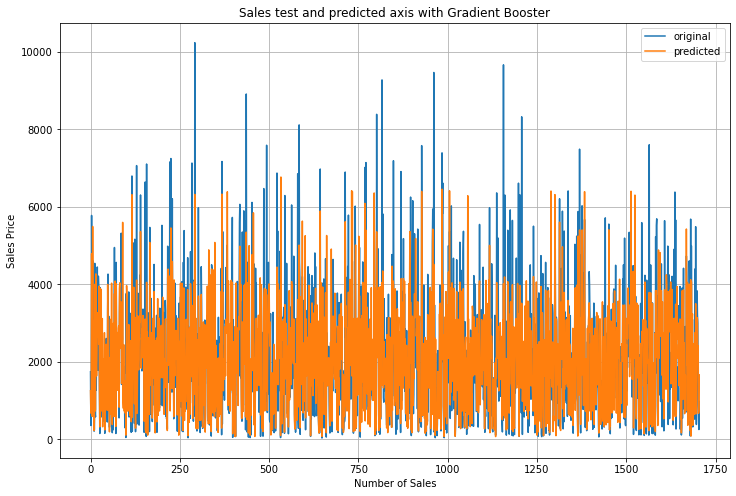

In [80]:
#plot original and predicted values

plt.figure(figsize=(12,8))
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred_RFR_2, label="predicted")
plt.title("Sales test and predicted axis with Gradient Booster")
plt.xlabel('Number of Sales')
plt.ylabel('Sales Price')
plt.legend(loc='best')
plt.grid(True)
plt.show()

#### with gradient boosting

In [84]:
#instantiate regressor
gb = GradientBoostingRegressor(random_state= 0)


#create parameters dictionary
gb_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5,6,7,8],
    'learning_rate': [0.001, 0.01, 0.1],
    'max_features': ['auto','sqrt','log2']
}


#create gridsearch
CV_rfr = GridSearchCV(estimator = gb, param_grid=gb_grid, cv=5)

#fit to training data
CV_rfr.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=0),
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'max_depth': [5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200, 300]})

In [85]:
print("The best params for Gradient Boost are:", CV_rfr.best_params_)
print("Best score for Gradient Boost is:", CV_rfr.best_score_)

The best params for Gradient Boost are: {'learning_rate': 0.01, 'max_depth': 5, 'max_features': 'auto', 'n_estimators': 300}
Best score for Gradient Boost is: 0.5926152880428143


In [87]:
#now use best params for random forest

#instantiate regressor
GB_2 = GradientBoostingRegressor(learning_rate = 0.01, max_depth = 5,
                                 max_features = 'auto', n_estimators = 300,
                                 random_state= 0)

#fit regressor to training set
GB_2.fit(X_train, y_train)

#create y prediction
y_pred_GB_2 = GB_2.predict(X_test)

#calculate the mean squared error
GB_2_mse = mean_squared_error(y_test, y_pred_GB_2)
print('MSE:', GB_2_mse)
print('RMSE:', np.sqrt(GB_2_mse))

#get score
print('Score:', GB_2.score(X_test, y_test))

MSE: 1064763.7017255714
RMSE: 1031.8738787882808
Score: 0.6082503943647293


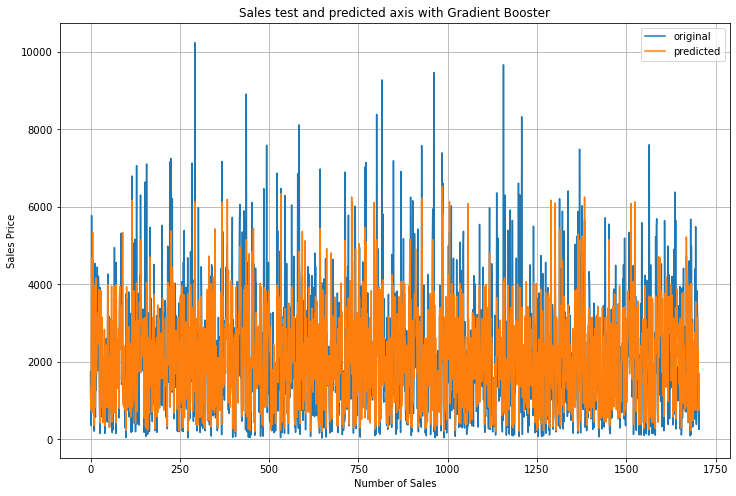

In [88]:
#plot original and predicted values

plt.figure(figsize=(12,8))
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred_GB_2, label="predicted")
plt.title("Sales test and predicted axis with Gradient Booster")
plt.xlabel('Number of Sales')
plt.ylabel('Sales Price')
plt.legend(loc='best')
plt.grid(True)
plt.show()

#### with XGBoost

In [93]:
#instantiate regressor
xg = xgb.XGBRegressor(random_state= 0)


#create parameters dictionary
xg_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [4, 5, 6],
    'subsample': [0.4,0.5],
    'colsample_bytree':[0.2, 0.3],
    'learning_rate': [0.001, 0.01, 0.1],
    'alpha': [0.1, 1, 10]             
}

#create gridsearch
CV_xg = GridSearchCV(estimator = xg, param_grid=xg_grid, cv=5)

#fit to training data
CV_xg.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=0,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_paramet

In [94]:
print("The best params for XGBoost are:", CV_xg.best_params_)
print("Best score for XGBoost is:", CV_xg.best_score_)

The best params for XGBoost are: {'alpha': 0.1, 'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100, 'subsample': 0.5}
Best score for XGBoost is: 0.5829269344282271


In [97]:
#now use best params for random forest

#instantiate regressor
XB_2 = xgb.XGBRegressor(subsample = 0.5, colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 4, alpha = 0.1, n_estimators = 100)

#fit regressor to training set
XB_2.fit(X_train, y_train)

#create y prediction
y_pred_XB_2 = XB_2.predict(X_test)

#calculate the mean squared error
XB_2_mse = mean_squared_error(y_test, y_pred_XB_2)
print('MSE:', XB_2_mse)
print('RMSE:', np.sqrt(XB_2_mse))

#get score
print('Score:', XB_2.score(X_test, y_test))

#get classification report
#report = classification_report(y_test, y_pred_XB_2)
#print(report)

MSE: 1059122.9586657784
RMSE: 1029.1369970347866
Score: 0.6103257457930158


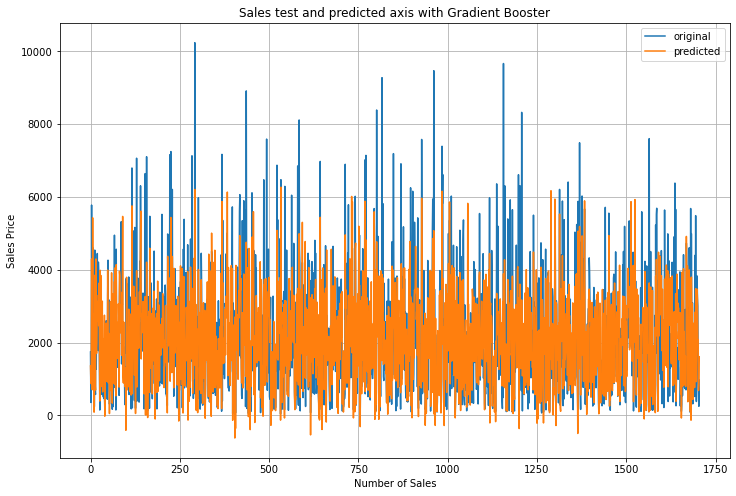

In [98]:
#plot original and predicted values
plt.figure(figsize=(12,8))
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred_XB_2, label="predicted")
plt.title("Sales test and predicted axis with Gradient Booster")
plt.xlabel('Number of Sales')
plt.ylabel('Sales Price')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [102]:
#cross validation with XGboost

#create a params dictionary
params = {"objective":"reg:linear",'subsample': 0.5, 'colsample_bytree': 0.3,
                'max_depth': 4, 'alpha': 0.1,'n_estimators': 100}

##build 5 fold cross validation model with data matrix built earlier
cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=5,
                    num_boost_round=50,early_stopping_rounds=10,
                    metrics="rmse", as_pandas=True, seed=123)

cv_results.head()

[12:40:12] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[12:40:12] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:541: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:40:12] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[12:40:12] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgbo

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,2143.553418,11.155662,2146.299902,71.152151
1,1790.744482,29.256213,1795.169556,63.645621
2,1563.684009,40.540035,1570.680396,58.273731
3,1421.155566,42.338628,1429.062768,56.745074
4,1331.511182,54.510205,1340.231348,71.185099


In [103]:
#extract and print the final boosting round metric
print((cv_results["test-rmse-mean"]).tail(1))

27    1099.845044
Name: test-rmse-mean, dtype: float64


This increased from 1029 per outlet sale price

In [106]:
#try to visualize results for fun
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

[12:42:39] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[12:42:39] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:541: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




<Figure size 1008x864 with 0 Axes>

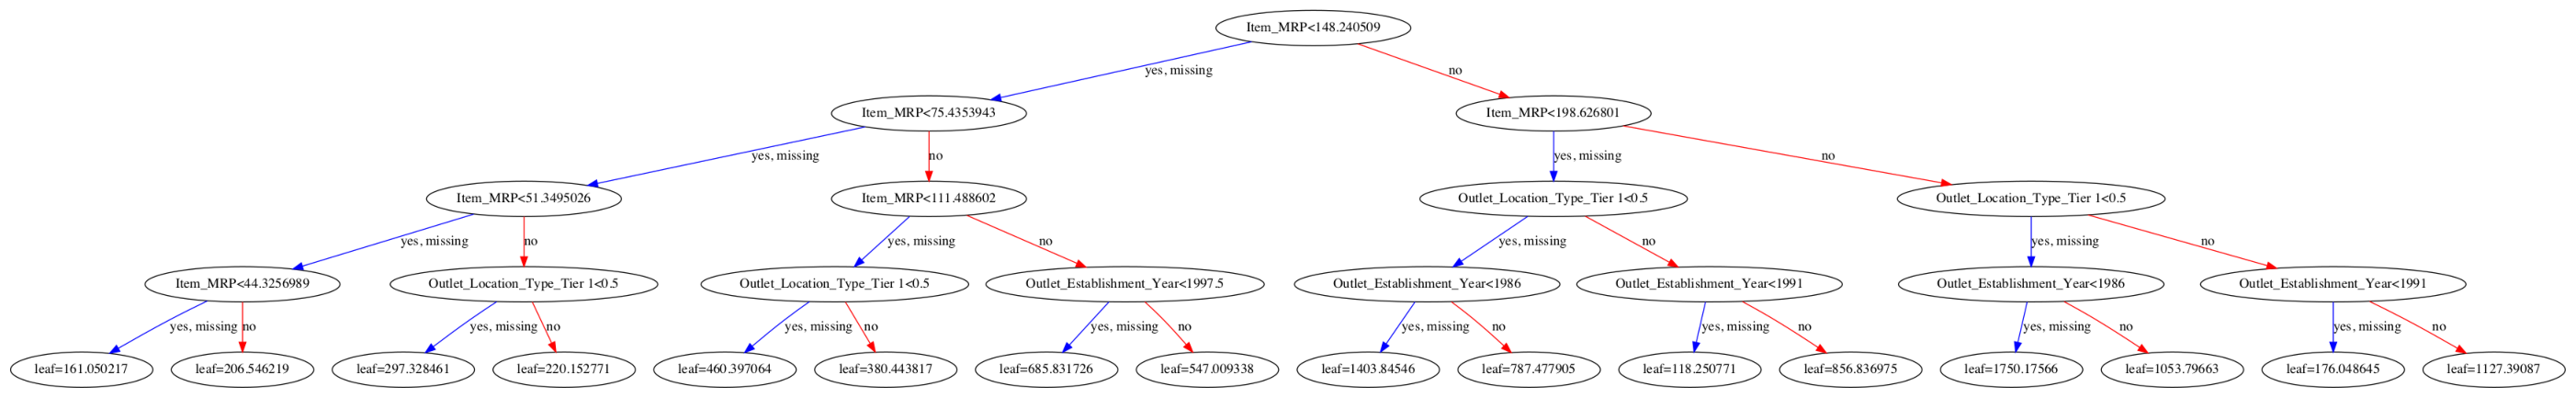

In [108]:
#create decision tree
plt.figure(figsize=(14,12))
xgb.plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [50, 10]
plt.show()

<Figure size 720x720 with 0 Axes>

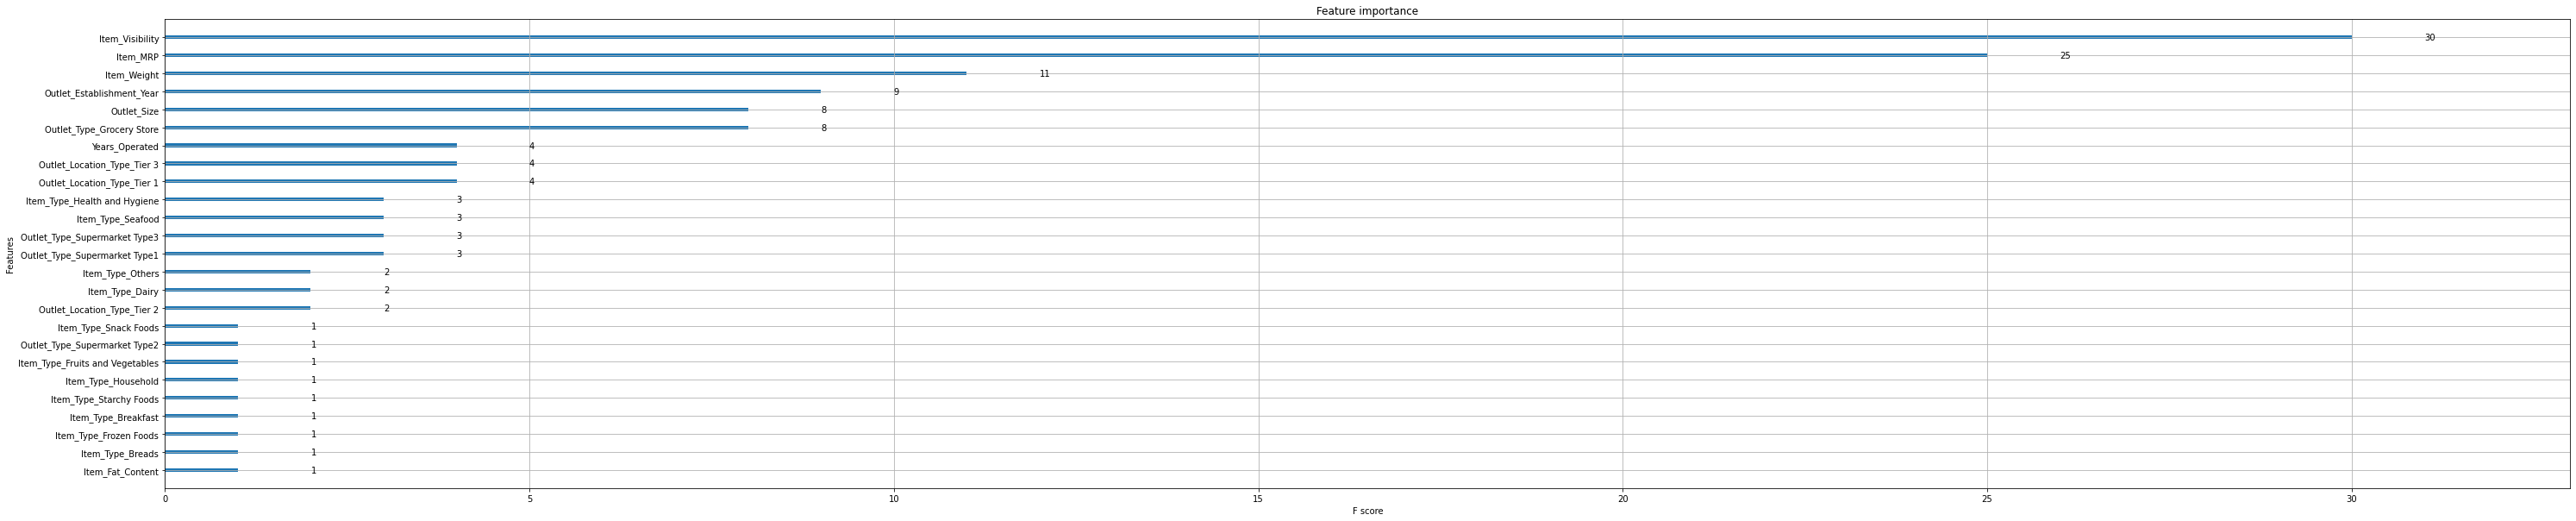

In [109]:
#to see most important features
plt.figure(figsize=(10,10))
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

### Comparison

From Monday:
    
    Ridge Regression resulted in a best score of 0.557543
    Lasso Regression resulted in a best score of 0.558191
    The Random Forest Regressor resulted in a best score of 0.6143479
    The Gradient Booster resulted in a best score of 0.608250
    The XGBoost resulted in a best score of 0.6103257
    
The best regressor was: Random Forest

The second best regressor was: XGBoost